In [58]:
%load_ext autoreload
%autoreload 2

from setup_imports import *  # noqa: F401,F403
from src.phrases.phrase_model import Phrase, PhraseAudio, Translation, get_phrase, get_phrase_by_english
from src.models import BCP47Language
from src.connections.gcloud_auth import get_firestore_client
from src.audio import get_voice_model, generate_translation_audio
from src.gcs_storage import read_from_gcs
from src.storage import PRIVATE_BUCKET, download_from_gcs
# Hello World Test - Full Workflow
# =================================

# OUR_PHRASE = "Hello, world!"
# phrase = Phrase.create_phrase(OUR_PHRASE, source="manual")
# print(f"✓ Created phrase: {phrase.phrase_hash}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
WarmUp150_phrase = download_from_gcs(bucket_name=PRIVATE_BUCKET, file_path="collections/WarmUp150/phrases.json")

In [60]:
WarmUp150_phrase[:10]

["Let's eat lunch tomorrow",
 'Can you play the guitar?',
 'I must finish my homework',
 "Don't wake me up early",
 'Do you like my hat?',
 'They arrived at the airport',
 "I can't find my coat",
 'Shall we go shopping today?',
 'The cake tastes delicious',
 'Could you help me, please?']

In [61]:
#french translation text

french_translations = download_from_gcs(bucket_name=PRIVATE_BUCKET, file_path="collections/WarmUp150/french/translations.json")

In [62]:
from itertools import islice
WARUMUP_PHRASES = []

for old_hash, phrase_dict in islice(french_translations.items(), 10):
    english_text = phrase_dict["english"]
    french_text = phrase_dict["french"]

    p = Phrase.create(english_text)
    p.collections.append('WarmUp150')
    p.translate('fr-FR', translated_text=french_text)
    WARUMUP_PHRASES.append(p)

In [67]:
WARUMUP_PHRASES[5].model_dump()

{'bucket_name': 'audio-language-trainer-private-content',
 'firestore_database': 'firephrases',
 'phrase_hash': 'look_at_that_beautiful_sunset_225a6a',
 'english': 'Look at that beautiful sunset',
 'english_lower': 'look at that beautiful sunset',
 'tokens': ['at', 'that', 'sunset', 'look', 'beautiful'],
 'verbs': ['look'],
 'vocab': ['at', 'that', 'sunset', 'beautiful'],
 'translations': {'en-GB': {'bucket_name': 'audio-language-trainer-private-content',
   'firestore_database': 'firephrases',
   'phrase_hash': 'look_at_that_beautiful_sunset_225a6a',
   'language': 'en-GB',
   'text': 'Look at that beautiful sunset',
   'text_lower': 'look at that beautiful sunset',
   'tokens': ['at', 'that', 'sunset', 'look', 'beautiful'],
   'audio': {},
   'image_file_path': 'phrases/en-GB/images/look_at_that_beautiful_sunset_225a6a.png'},
  'fr-FR': {'bucket_name': 'audio-language-trainer-private-content',
   'firestore_database': 'firephrases',
   'phrase_hash': 'look_at_that_beautiful_sunset_22

In [81]:
for p in WARUMUP_PHRASES:
    p.download()

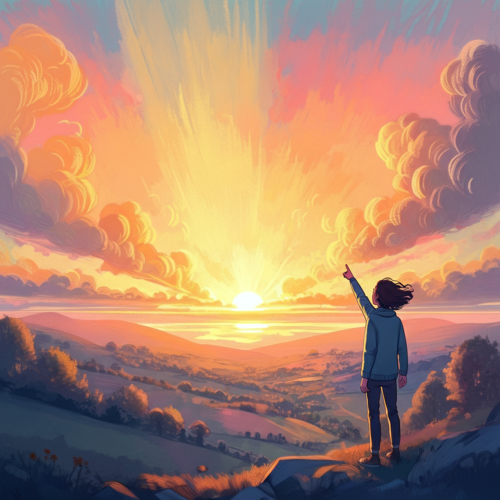

In [82]:
WARUMUP_PHRASES[5].translations['fr-FR'].image

In [ ]:
for phrase in WarmUp150_phrase[:10]:
    p1 = Phrase.create(WarmUp150_phrase[0])
    p1.collections.append('WarmUp150')
    p1.translate('fr-FR')a
    p1.generate_audio()

✅ Natural Language API client initialized


In [44]:
p1.translate(BCP47Language('fr-FR'))

✅ Google Translate API client initialized


Translation(bucket_name='audio-language-trainer-private-content', firestore_database='firephrases', firestore_document_ref=<google.cloud.firestore_v1.document.DocumentReference object at 0x00000260385A0A40>, phrase_hash='lets_eat_lunch_tomorrow_b765fb', language=Language.make(language='fr', territory='FR'), text='Mangeons le déjeuner demain', text_lower='mangeons le déjeuner demain', tokens=['Mangeons', 'le', 'déjeuner', 'demain'], audio={}, image_file_path='phrases/en-GB/images/lets_eat_lunch_tomorrow_b765fb.png', image=None)

In [54]:
p1.upload()

Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


In [49]:
p1.generate_audio("flashcard", BCP47Language('fr-FR'))

In [51]:
p1.get_audio('fr-FR', "flashcard", "slow")

In [46]:
p1.get_audio('fr-FR', "flashcard", "slow" )

ValueError: No audio found for fr-FR with context='flashcard' and speed='slow'. Available contexts: []

In [31]:
p1.translations['fr-FR'].audio[0].model_dump()

{'bucket_name': 'audio-language-trainer-private-content',
 'firestore_database': 'firephrases',
 'phrase_hash': 'lets_eat_lunch_tomorrow_b765fb',
 'text': 'Mangeons ensemble demain midi',
 'file_path': 'phrases/fr-FR/audio/flashcard/normal/lets_eat_lunch_tomorrow_b765fb.mp3',
 'language': 'fr-FR',
 'context': 'flashcard',
 'speed': 'normal',
 'voice_info': {'provider': 'google',
  'voice_id': 'fr-FR-Neural2-F',
  'language_code': 'fr-FR'},
 'duration_seconds': 1.68}

In [39]:
p1.generate_audio(context="flashcard", language=BCP47Language('fr-FR'))

✅ Authenticated with Google Cloud project: swedish-course
✅ Google Text-to-Speech API client initialized


E0000 00:00:1765103913.636148   21206 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [42]:
p1.translations['fr-FR'].audio[0].audio_segment

In [43]:
p1.upload()

In [16]:
p1 = get_phrase('lets_eat_lunch_tomorrow_b765fb')

In [1]:
p1.model_dump()

NameError: name 'p1' is not defined

In [24]:
p1.generate_audio(context="flashcard", language="fr-FR")


In [ ]:
p1.tran

In [35]:
phrase.translations[0].firestore_document_ref

In [48]:
phrase.translations[1]._upload_to_gcs()

✅ Authenticated with Google Cloud project: swedish-course
✅ Google Cloud Storage client initialized


ValueError: No image attached to translation (fr-FR)

In [20]:

# Add German translation
de = phrase.translate(BCP47Language.get("de-DE"), refine=True)
print(f"✓ German: {de.text}")


✓ German: Hallo, Welt!


In [ ]:
# Generate audio for each translation using the new generate_audio() method
# For flashcard context: generates slow and normal speeds
# For story context: generates normal and fast speeds

# French audio
print("Generating French audio (flashcard)...")
fr.generate_audio(context="flashcard", bucket_name="audio-language-trainer-private-content")
print(f"✓ French audio generated: {len(fr.audio)} audio files")
for audio in fr.audio:
    print(f"  - {audio.context} / {audio.speed}: {audio.file_path}")

# German audio
print("\nGenerating German audio (flashcard)...")
de.generate_audio(context="flashcard", bucket_name="audio-language-trainer-private-content")
print(f"✓ German audio generated: {len(de.audio)} audio files")
for audio in de.audio:
    print(f"  - {audio.context} / {audio.speed}: {audio.file_path}")

In [ ]:
# Get the English translation and generate image
en_gb = phrase.translations[0]  # The en-GB translation created in create_phrase()
print(f"✓ English translation: {en_gb.text}")

# Generate image for the English translation (shared across all language variants)
image_prompt = "A cheerful greeting scene with two people waving hello, bright morning sunlight"
image = generate_image(image_prompt, style="ghibli", project_id="swedish-course")
en_gb.image = image
en_gb.upload_image("audio-language-trainer-private-content")
print(f"✓ Image generated and attached: {en_gb.image_file_path}")

In [50]:
# Test phrase generation with small vocab_dict
from src.phrases.generation import generate_phrases_from_vocab_dict

# Small test vocab_dict with a few verbs and vocabs
test_vocab_dict = {
    "verbs": ["want", "go", "see"],
    "vocab": ["apple", "table", "red", "big", "old", "door", "window", "house"]
}

print("=" * 60)
print("TESTING PHRASE GENERATION")
print("=" * 60)
print(f"\nInput vocab_dict:")
print(f"  Verbs: {test_vocab_dict['verbs']}")
print(f"  Vocab: {test_vocab_dict['vocab']}")
print(f"\nGenerating phrases...")
print("-" * 60)

try:
    phrases, tracking = generate_phrases_from_vocab_dict(
        test_vocab_dict, 
        max_iterations=1  # Just one iteration for testing
    )
    
    print(f"\n✓ Generation complete!")
    print(f"\nResults:")
    print(f"  Total phrases generated: {tracking['total_phrases']}")
    print(f"  Verb phrases: {tracking['verb_phrases']}")
    print(f"  Vocab phrases: {tracking['vocab_phrases']}")
    print(f"  Verbs processed: {tracking['verbs_processed']}")
    print(f"  Vocab processed: {tracking['vocab_processed']}")
    print(f"  Additional words found: {len(tracking['words_used'])}")
    
    if tracking['errors']:
        print(f"\n⚠ Errors encountered:")
        for error in tracking['errors']:
            print(f"  - {error}")
    
    print(f"\nGenerated Phrases (first 20):")
    for i, phrase in enumerate(phrases[:20], 1):
        print(f"  {i}. {phrase}")
    
    if len(phrases) > 20:
        print(f"  ... and {len(phrases) - 20} more phrases")
    
    print(f"\nAdditional words tracked:")
    print(f"  {tracking['words_used']}")
    
except Exception as e:
    print(f"\n✗ Error during phrase generation:")
    print(f"  {type(e).__name__}: {e}")
    import traceback
    traceback.print_exc()

TESTING PHRASE GENERATION

Input vocab_dict:
  Verbs: ['want', 'go', 'see']
  Vocab: ['apple', 'table', 'red', 'big', 'old', 'door', 'window', 'house']

Generating phrases...
------------------------------------------------------------
Starting verb phrase generation. 3 verbs to process.
  [1/3] Generating phrases for verb: 'want'
  ERROR: Error generating phrases for verb 'want': Failed to generate phrases for verb 'want': Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-sonnet-latest'}, 'request_id': 'req_011CVR6zTHysr5DCibt3LDrf'}
  [2/3] Generating phrases for verb: 'go'
  ERROR: Error generating phrases for verb 'go': Failed to generate phrases for verb 'go': Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-sonnet-latest'}, 'request_id': 'req_011CVR6zU38TNCN3w98d1XqT'}
  [3/3] Generating phrases for verb: 'see'
  ERROR: Error generating phrases for verb 'see': Failed to generate phr